## 1. 언어 모델을 사용한 문장 생성

### 1. RNN을 사용한 문장 생성의 순서
언어 모델 : 지금까지 주어진 단어들에서 다음에 출현하는 단어의 확률분포 출력  
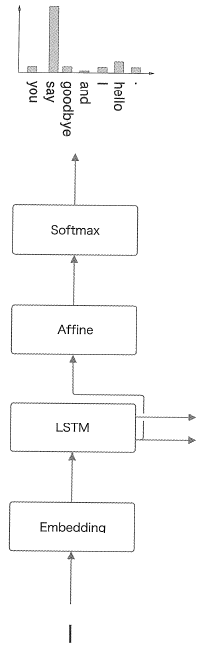  
> **"I" 단어를 주어졌을 때 확률분포를 출력!**

1. 확률이 가장 높은 단어 선택 : 결과가 일정하게 정해지는 **결정적(결과가 하나로 정해지는 것)** 방법  
2. 확률적으로 선택 : 각 후보 단어의 확률에 맞게 선택, 확률이 높은 단어는 선택되기 쉽고 확률이 낮은 단어는 선택되기 어려움, 선택되는 단어가 매번 다름  

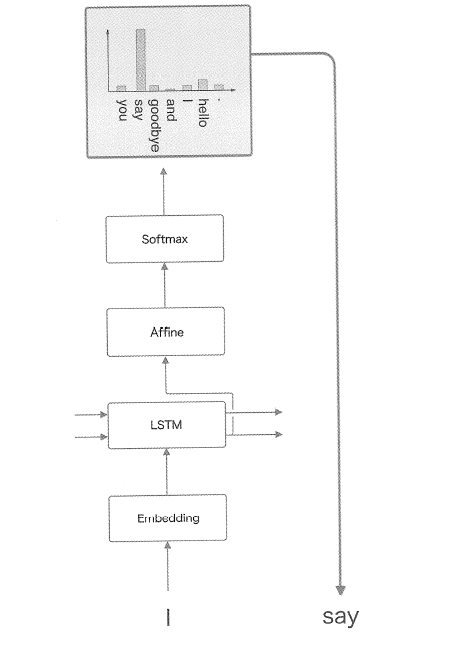  
> **"say"라는 단어가 확률적으로 선택!**  
※ 필연적인 것이 아니고 확률적으로 결정된 것! 다른 단어들도 해당 단어의 출현 확률에 따라 정해진 비율만큼 샘플링 가능성 있음!

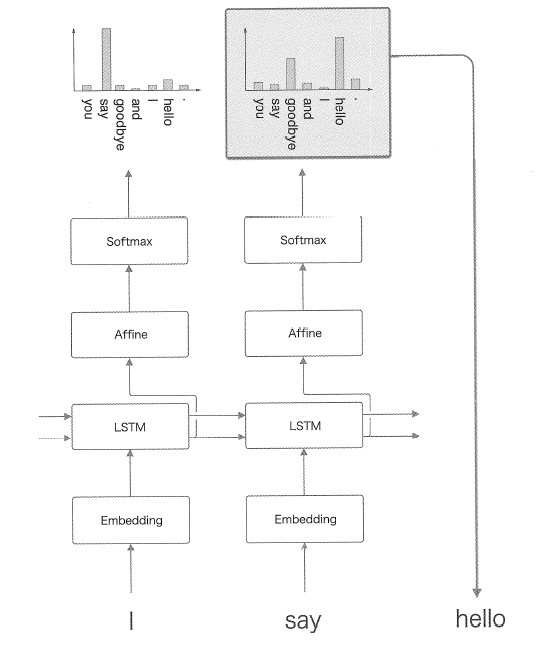  
> **"say"를 언어 모델에 입력해 앞의 작업을 되풀이, 확률분포를 기초로 다음에 출현할 단어를 샘플링**

언어 모델 : **훈련 데이터에서 사용된 단어의 정렬 패턴을 학습** ⇒ 새로운 문장을 생성

### 2. 문장 생성 구현

In [1]:
import sys
sys.path.append('..')
import numpy as np
from common.functions import softmax
from ch06.rnnlm import Rnnlm
from ch06.better_rnnlm import BetterRnnlm


class RnnlmGen(Rnnlm):
    def generate(self, start_id, skip_ids=None, sample_size=100):  # sample size : 샘플링하는 단어 수
                                                                    # skip_id : 샘플링되지 않는 단어 ID 리스트
        word_ids = [start_id]

        x = start_id # 최초로 주어지는 단어의 ID
        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1, 1)
            score = self.predict(x) # 각 단어의 정규화되기 전 점수 출력
            p = softmax(score.flatten()) # 소프트맥스 함수를 이용해 정규화
            # P : 목표로 하는 확률분포

            sampled = np.random.choice(len(p), size=1, p=p) # 확률분포로부터 다음 단어를 샘플링
            if (skip_ids is None) or (sampled not in skip_ids):
                x = sampled
                word_ids.append(int(x))

        return word_ids

**문장 생성하기**  

In [4]:
import sys
sys.path.append('..')
from ch07.rnnlm_gen import RnnlmGen
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('./ch06/Rnnlm.pkl') # 6장에서 학습한 가중치 매개변수 입력

# start 문자와 skip 문자 설정
start_word = 'you' # 첫 단어
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$'] # 샘플링하지 않을 단어(N : 숫자, <unk> : 희소단어)
skip_ids = [word_to_id[w] for w in skip_words]

# 문장 생성
word_ids = model.generate(start_id, skip_ids) # generate : 단어 ID 배열 반환
txt = ' '.join([id_to_word[i] for i in word_ids]) # 단어 ID 배열을 문장으로 변환
txt = txt.replace(' <eos>', '.\n')
print(txt)

you think as they sought to sit copper.
 were in the afternoon.
 the two products would result at the rate of privately less morris systems.
 after china over-the-counter tuesday reflecting a modest wall loss from the copper for a year first-half most waiting by amid strong growth.
 the treasury bond corp. 's settlement for southern co. 's securities may lead the empire.
 the industry had grown nearly half of # about the year of face value much more than violating changing air and government problems.
 the official plans to strengthen the party voters planning


### 3. 더 좋은 문장으로

In [7]:
import sys
sys.path.append('..')
from common.np import *
from ch07.rnnlm_gen import BetterRnnlmGen
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)


model = BetterRnnlmGen()
model.load_params('./ch06/BetterRnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')

print(txt)

you could continue to sit said james.
 in the same thing he says the cleveland 's compensation has as it 's got on the work act.
 some capitalism in the networks are looking till to build three or two emerging wines on the screen.
 several youngsters have been calling for a training strategies without cbs is a history.
 and the first of each time for college football in yesterday 's respondents are hopeful that the client 's work is not the glossy engineers ancient find more welcome than it was lucky.
 quotron claims it could


In [9]:
model.reset_state()

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

the meaning of life is not the same privatized marketers of scandals.
 but they may wanted to improve such the presidency at all this.
 the sec catch the message on this matter says michael an upscale consultant at the university of san francisco.
 he is likely to put an intense role on its policy to staging new restrictions on the new u.s. district system.
 it has been so far so interesting deny that the treaty is likely to influence a cooperative leasing problem mr. goldberg contends.
 the leveraged buy-out of their computers has suspended up moving overtime from its


## 2. seq2seq
### 1. seq2seq의 원리

**seq2seq(Encoder-Decoder 모델)**  
- Encoder : 입력데이터를 인코딩(부호화)  
- Decoder : 인코딩된 데이터를 디코딩(복호화), 원래의 정보로 되돌림  
- 2개의 LSTM을 사용해 시계열 데이터를 다른 시계열 데이터로 변환  

A. Encoder  
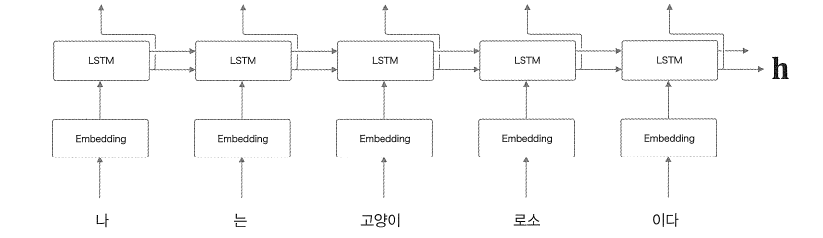

- 시계열 데이터를 은닉 상태 벡터 **h**로 변환  
- simpleRNN, LSTM, GRU 모두 사용 가능  
- **임의 길이의 문장을 고정 길이 벡터로 변환하는 작업**  
> Encoder가 출력한 벡터 **h**가 LSTM 계층의 마지막 은닉 상태 : 고정 길이 벡터  
> 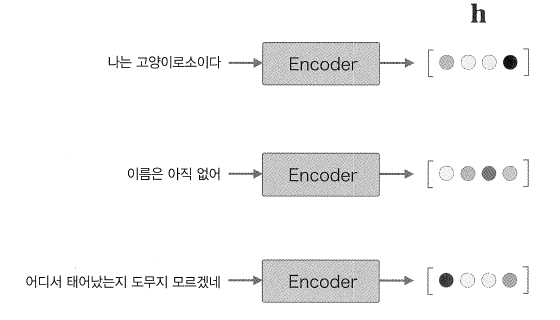

B. Decoder  
- 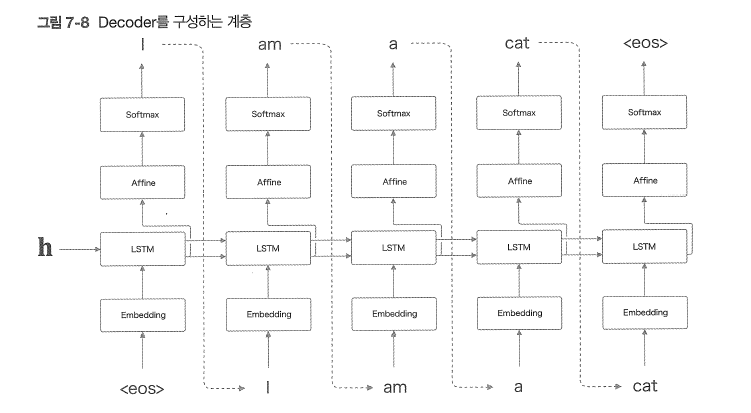  

- LSTM 계층이 벡터 **h**를 입력받는다.  
※ ```<eos>``` : '구분자', Decoder에 문장 생성의 시작을 알리는 신호이자 단어 샘플링을 위한 종료 신호  

**seq2seq의 전체 계층**  
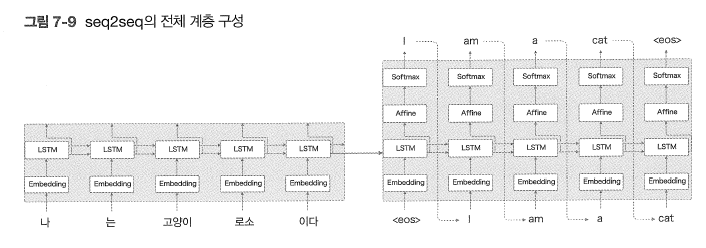
- LSTM 계층의 은닉 상태가 Encoder와 Decoder 연결

### 2. 시계열 데이터 변환용 장난감 문제

**장난감 문제(toy problem)** : 머신러닝을 평가하고자 만든 간단한 문제  
- 덧셈 예제들을 학습시킬 예정!  
- 문장을 단어가 아닌 '문자' 단위로 분할  
- 예) "57+5" ⇒ ['5','7','+','5']

### 3. 가변 길이 시계열 데이터
- 덧셈 문제 : 샘플마다 데이터의 시간 방향 크기가 다르다. ⇒ **가변 길이 시계열 데이터**  
- 미니배치로 학습하기 위한 방법 : **패딩(padding)**  
> 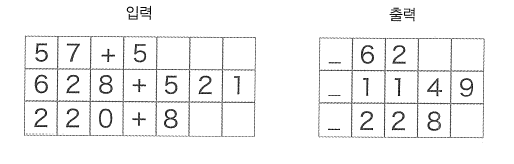
> - 원래의 데이터에 의미 없는 데이터를 채워 모든 데이터 길이를 균일하게 맞춤  
> - 이번 문제 :0~999 사이 숫자 2개의 덧셈 → 최대 입력 문자 수 = 7, 최대 결과 4문자  
> - 정답 데이터에도 패딩 수행  
> - 질문/정답 구분 위해 출력 앞에 구분자 '_' 추가 : Decoder에 문자열 생성을 알리는 신호

- 정확성이 중요하다면 seq2seq에 **패딩 전용 처리** 추가  
- Decoder에 입력된 데이터가 패딩일 때 : Softmax with Loss 계층에 '마스크' 기능 추가  
- Encoder에 입력된 데이터가 패딩일 때 : LSTM 계층이 이전 시각의 입력을 그대로 출력하게 함  

### 4. 덧셈 데이터셋

In [11]:
import sys
sys.path.append('..')
from dataset import sequence


(x_train, t_train), (x_test, t_test) = \
    sequence.load_data('addition.txt', seed=1984) 
    # load_data() : 텍스트 파일을 읽어 텍스트를 문자 ID로 변환, train-test 데이터로 나눠 반환
char_to_id, id_to_char = sequence.get_vocab()
    # get_vocab() : 문자 & 문자 ID의 대응 관계에 대한 딕셔너리 반환


print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

(45000, 7) (45000, 5)
(5000, 7) (5000, 5)


In [12]:
print(x_train[0])
print(t_train[0]) # 문자 ID 저장

[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]


In [13]:
print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))

71+118 
_189 


## 3. seq2seq 구현
**1. Encoder**  
- Embedding 계층 + LSTM 계층  
- 문자(문자 ID)를 문자 벡터로 변환 ⇒ LSTM 계층으로 입력
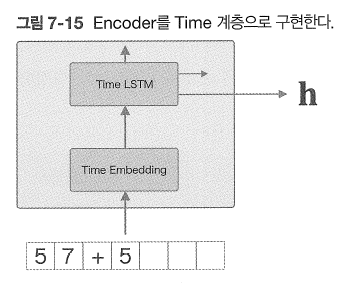
- 위쪽 : 은닉 상태만 출력 - 폐기  
- 오른쪽 : 은닉 상태 & 셀(자기 자신만 사용한다는 전제) 출력 - 은닉상태만 Decoder에 전달

In [15]:
import sys
sys.path.append('..')
from common.time_layers import *
from common.base_model import BaseModel


class Encoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        # vocab_size : 문자 종류 - 0~9, +, 공백, _ - 총 13가지 문자
        # wordvec_size : 문자 벡터 차원 수  
        # hidden_size : LSTM 계층의 은닉 상태 벡터 차원 수
        
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False) # TimeLSTM 계층이 상태를 유지하지 않음!

        self.params = self.embed.params + self.lstm.params
        self.grads = self.embed.grads + self.lstm.grads
        self.hs = None

In [16]:
def forward(self, xs):
        xs = self.embed.forward(xs) # Time Embedding 계층
        hs = self.lstm.forward(xs) # Time LSTM 계층
        self.hs = hs
        return hs[:, -1, :] # TimeLSTM 계층의 마지막 은닉 상태만 출력

    
def backward(self, dh): # dh : LSTM 계층의 마지막 은닉 상태에 대한 기울기, Deocder가 전해줌
        dhs = np.zeros_like(self.hs) 
        dhs[:, -1, :] = dh

        dout = self.lstm.backward(dhs) # TimeLSTM 계층 역전파
        dout = self.embed.backward(dout) # TimeEmbedding 계층 역전파
        return dout

### 2. Decoder 클래스
- 덧셈 문제이므로 확률적 방법 대신 **결정적인 답** 생성!
- 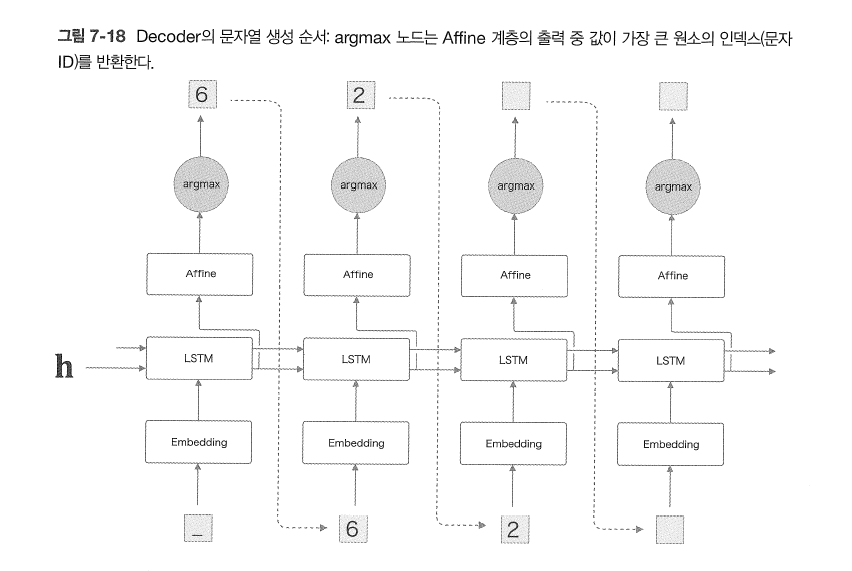

argmax 노드 : 최댓값을 가진 원소의 인덱스(문자 ID)를 선택  
→ Softmax 계층을 사용하지 않고 Affine 계층의 출력 점수가 가장 큰 문자 ID를 선택

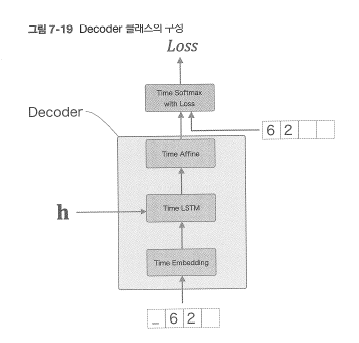

**Decoder 과정은 Softmax with Loss 계층 앞까지만!**  
⇒ 학습 시와 생성 시 동작이 다름!

In [1]:
class Decoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size): # 초기화
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, h): # 순전파
        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        out = self.lstm.forward(out)
        score = self.affine.forward(out)
        return score

    def backward(self, dscore): # 역전파, dscore : Softmax with Loss 계층에서 받은 기울기
        dout = self.affine.backward(dscore)
        dout = self.lstm.backward(dout)
        dout = self.embed.backward(dout)
        dh = self.lstm.dh
        return dh

In [2]:
def generate(self, h, start_id, sample_size):   # 문장 생성
                                                # h : Encoder에서 받은 은닉 상태
                                                # start_id : 최초로 주어진 문자 ID
                                                # sample_size : 생성하는 문자 수
        sampled = []
        sample_id = start_id
        self.lstm.set_state(h)

        for _ in range(sample_size):
            x = np.array(sample_id).reshape((1, 1))
            out = self.embed.forward(x)
            out = self.lstm.forward(out)
            score = self.affine.forward(out) # Affine 계층이 출력한 점수

            sample_id = np.argmax(score.flatten()) # score가 가장 큰 문자 ID 출력
            sampled.append(int(sample_id))

        return sampled

### 3. Seq2seq 클래스
- Encoder + Decoder 연결 → Time Softmax with Loss 계층으로 손실 계산

In [4]:
import sys
sys.path.append('..')
from common.time_layers import *
from common.base_model import BaseModel

class Seq2seq(BaseModel):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = Decoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

    def forward(self, xs, ts):
        decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]

        h = self.encoder.forward(xs)
        score = self.decoder.forward(decoder_xs, h)
        loss = self.softmax.forward(score, decoder_ts)
        return loss

    def backward(self, dout=1):
        dout = self.softmax.backward(dout)
        dh = self.decoder.backward(dout)
        dout = self.encoder.backward(dh)
        return dout

    def generate(self, xs, start_id, sample_size):
        h = self.encoder.forward(xs)
        sampled = self.decoder.generate(h, start_id, sample_size)
        return sampled

### 4. seq2seq 평가
학습 방법  
Step 1. 학습 데이터에서 미니배치 선택  
Step 2. 미니배치로부터 기울기 계산  
Step 3. 기울기를 사용해 매개변수 갱신

In [9]:
# 매 epoch 마다 seq2seq가 문자열 생성, 학습 중간마다 정답률 측정
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()


# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 설정 =====================================================
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)
        # 평가 척도 : 정답률 - epoch마다 테스트 데이터의 문제 중 몇 개를 올바르게 답했는지 채점
        # eval_seq2seq() : 문제를 모델에 주고 문자열을 생성해 답과 같은지 판정 - 맞으면 1, 틀리면 0 출력
        
    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 2.53
| 에폭 1 |  반복 41 / 351 | 시간 2[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 3[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 5[s] | 손실 1.92
| 에폭 1 |  반복 101 / 351 | 시간 6[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 7[s] | 손실 1.85
| 에폭 1 |  반복 141 / 351 | 시간 8[s] | 손실 1.83
| 에폭 1 |  반복 161 / 351 | 시간 9[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 10[s] | 손실 1.77
| 에폭 1 |  반복 201 / 351 | 시간 12[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 13[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 14[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 15[s] | 손실 1.76
| 에폭 1 |  반복 281 / 351 | 시간 16[s] | 손실 1.75
| 에폭 1 |  반복 301 / 351 | 시간 17[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 18[s] | 손실 1.75
| 에폭 1 |  반복 341 / 351 | 시간 19[s] | 손실 1.74
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1000
---
Q 582+84 
T 666 
X 1000
---
Q 8+155  
T 163 
X 100 
---
Q 367+55 
T 422 
X 1000
---
Q 600+257
T 857 
X 1000
---
Q 761+292
T 1053
X 1000
---
Q 830+597
T 1427
X 1000
---

| 에폭 8 |  반복 341 / 351 | 시간 20[s] | 손실 1.00
Q 77+85  
T 162 
X 158 
---
Q 975+164
T 1139
X 1160
---
Q 582+84 
T 666 
X 656 
---
Q 8+155  
T 163 
X 156 
---
Q 367+55 
T 422 
X 411 
---
Q 600+257
T 857 
X 838 
---
Q 761+292
T 1053
X 1039
---
Q 830+597
T 1427
X 1411
---
Q 26+838 
T 864 
X 868 
---
Q 143+93 
T 236 
X 227 
---
검증 정확도 3.980%
| 에폭 9 |  반복 1 / 351 | 시간 0[s] | 손실 0.99
| 에폭 9 |  반복 21 / 351 | 시간 1[s] | 손실 0.99
| 에폭 9 |  반복 41 / 351 | 시간 2[s] | 손실 1.00
| 에폭 9 |  반복 61 / 351 | 시간 3[s] | 손실 1.00
| 에폭 9 |  반복 81 / 351 | 시간 4[s] | 손실 1.00
| 에폭 9 |  반복 101 / 351 | 시간 5[s] | 손실 1.00
| 에폭 9 |  반복 121 / 351 | 시간 7[s] | 손실 1.00
| 에폭 9 |  반복 141 / 351 | 시간 8[s] | 손실 1.00
| 에폭 9 |  반복 161 / 351 | 시간 9[s] | 손실 0.99
| 에폭 9 |  반복 181 / 351 | 시간 10[s] | 손실 0.97
| 에폭 9 |  반복 201 / 351 | 시간 11[s] | 손실 0.98
| 에폭 9 |  반복 221 / 351 | 시간 13[s] | 손실 0.98
| 에폭 9 |  반복 241 / 351 | 시간 14[s] | 손실 0.99
| 에폭 9 |  반복 261 / 351 | 시간 15[s] | 손실 0.98
| 에폭 9 |  반복 281 / 351 | 시간 16[s] | 손실 0.99
| 에폭 9 |  반복 301 

| 에폭 16 |  반복 121 / 351 | 시간 6[s] | 손실 0.87
| 에폭 16 |  반복 141 / 351 | 시간 8[s] | 손실 0.87
| 에폭 16 |  반복 161 / 351 | 시간 9[s] | 손실 0.87
| 에폭 16 |  반복 181 / 351 | 시간 10[s] | 손실 0.86
| 에폭 16 |  반복 201 / 351 | 시간 11[s] | 손실 0.85
| 에폭 16 |  반복 221 / 351 | 시간 12[s] | 손실 0.85
| 에폭 16 |  반복 241 / 351 | 시간 13[s] | 손실 0.84
| 에폭 16 |  반복 261 / 351 | 시간 15[s] | 손실 0.84
| 에폭 16 |  반복 281 / 351 | 시간 16[s] | 손실 0.88
| 에폭 16 |  반복 301 / 351 | 시간 17[s] | 손실 0.85
| 에폭 16 |  반복 321 / 351 | 시간 18[s] | 손실 0.85
| 에폭 16 |  반복 341 / 351 | 시간 19[s] | 손실 0.85
Q 77+85  
T 162 
O 162 
---
Q 975+164
T 1139
X 1126
---
Q 582+84 
T 666 
X 662 
---
Q 8+155  
T 163 
X 162 
---
Q 367+55 
T 422 
X 420 
---
Q 600+257
T 857 
X 856 
---
Q 761+292
T 1053
X 1049
---
Q 830+597
T 1427
X 1418
---
Q 26+838 
T 864 
X 868 
---
Q 143+93 
T 236 
X 239 
---
검증 정확도 7.940%
| 에폭 17 |  반복 1 / 351 | 시간 0[s] | 손실 0.84
| 에폭 17 |  반복 21 / 351 | 시간 1[s] | 손실 0.87
| 에폭 17 |  반복 41 / 351 | 시간 2[s] | 손실 0.89
| 에폭 17 |  반복 61 / 351 | 시간 3[s] | 손실 0.8

검증 정확도 11.540%
| 에폭 24 |  반복 1 / 351 | 시간 0[s] | 손실 0.74
| 에폭 24 |  반복 21 / 351 | 시간 1[s] | 손실 0.80
| 에폭 24 |  반복 41 / 351 | 시간 2[s] | 손실 0.81
| 에폭 24 |  반복 61 / 351 | 시간 3[s] | 손실 0.77
| 에폭 24 |  반복 81 / 351 | 시간 4[s] | 손실 0.79
| 에폭 24 |  반복 101 / 351 | 시간 5[s] | 손실 0.81
| 에폭 24 |  반복 121 / 351 | 시간 6[s] | 손실 0.82
| 에폭 24 |  반복 141 / 351 | 시간 8[s] | 손실 0.78
| 에폭 24 |  반복 161 / 351 | 시간 9[s] | 손실 0.83
| 에폭 24 |  반복 181 / 351 | 시간 10[s] | 손실 0.79
| 에폭 24 |  반복 201 / 351 | 시간 11[s] | 손실 0.81
| 에폭 24 |  반복 221 / 351 | 시간 12[s] | 손실 0.80
| 에폭 24 |  반복 241 / 351 | 시간 13[s] | 손실 0.77
| 에폭 24 |  반복 261 / 351 | 시간 14[s] | 손실 0.78
| 에폭 24 |  반복 281 / 351 | 시간 16[s] | 손실 0.77
| 에폭 24 |  반복 301 / 351 | 시간 17[s] | 손실 0.79
| 에폭 24 |  반복 321 / 351 | 시간 18[s] | 손실 0.80
| 에폭 24 |  반복 341 / 351 | 시간 19[s] | 손실 0.77
Q 77+85  
T 162 
O 162 
---
Q 975+164
T 1139
X 1151
---
Q 582+84 
T 666 
X 665 
---
Q 8+155  
T 163 
X 162 
---
Q 367+55 
T 422 
X 417 
---
Q 600+257
T 857 
X 856 
---
Q 761+292
T 1053
X 106

C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarni

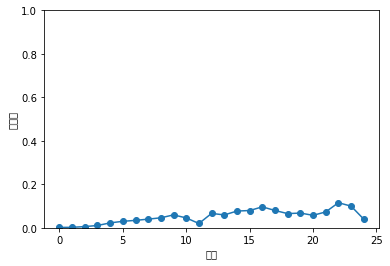

In [11]:
# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()

정답률이 점차 상승! - 학습을 늘리면 정확도 상승할 것!

## 4. seq2seq 개선
### 1. 입력 데이터 반전(Reverse)

입력 데이터의 순서를 반전  
- 학습 진행 빨라짐, 최종 정확도 개선

In [12]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 혹은 엿보기(Peeky) 설정 =====================================
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)
        # 평가 척도 : 정답률 - epoch마다 테스트 데이터의 문제 중 몇 개를 올바르게 답했는지 채점
        # eval_seq2seq() : 문제를 모델에 주고 문자열을 생성해 답과 같은지 판정 - 맞으면 1, 틀리면 0 출력
        
    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 2.52
| 에폭 1 |  반복 41 / 351 | 시간 2[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 3[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 4[s] | 손실 1.91
| 에폭 1 |  반복 101 / 351 | 시간 5[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 6[s] | 손실 1.86
| 에폭 1 |  반복 141 / 351 | 시간 7[s] | 손실 1.84
| 에폭 1 |  반복 161 / 351 | 시간 8[s] | 손실 1.80
| 에폭 1 |  반복 181 / 351 | 시간 10[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 11[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 12[s] | 손실 1.77
| 에폭 1 |  반복 241 / 351 | 시간 13[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 14[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 15[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 16[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 17[s] | 손실 1.74
| 에폭 1 |  반복 341 / 351 | 시간 18[s] | 손실 1.73
Q 77+85  
T 162 
X 100 
---
Q 975+164
T 1139
X 1000
---
Q 582+84 
T 666 
X 1001
---
Q 8+155  
T 163 
X 100 
---
Q 367+55 
T 422 
X 1001
---
Q 600+257
T 857 
X 1000
---
Q 761+292
T 1053
X 1000
---
Q 830+597
T 1427
X 1000
---

| 에폭 8 |  반복 341 / 351 | 시간 20[s] | 손실 0.57
Q 77+85  
T 162 
X 163 
---
Q 975+164
T 1139
X 1134
---
Q 582+84 
T 666 
O 666 
---
Q 8+155  
T 163 
X 162 
---
Q 367+55 
T 422 
X 423 
---
Q 600+257
T 857 
X 759 
---
Q 761+292
T 1053
O 1053
---
Q 830+597
T 1427
X 1431
---
Q 26+838 
T 864 
X 866 
---
Q 143+93 
T 236 
X 238 
---
검증 정확도 23.080%
| 에폭 9 |  반복 1 / 351 | 시간 0[s] | 손실 0.55
| 에폭 9 |  반복 21 / 351 | 시간 1[s] | 손실 0.56
| 에폭 9 |  반복 41 / 351 | 시간 2[s] | 손실 0.56
| 에폭 9 |  반복 61 / 351 | 시간 3[s] | 손실 0.55
| 에폭 9 |  반복 81 / 351 | 시간 4[s] | 손실 0.54
| 에폭 9 |  반복 101 / 351 | 시간 5[s] | 손실 0.55
| 에폭 9 |  반복 121 / 351 | 시간 6[s] | 손실 0.55
| 에폭 9 |  반복 141 / 351 | 시간 7[s] | 손실 0.54
| 에폭 9 |  반복 161 / 351 | 시간 9[s] | 손실 0.55
| 에폭 9 |  반복 181 / 351 | 시간 10[s] | 손실 0.53
| 에폭 9 |  반복 201 / 351 | 시간 11[s] | 손실 0.54
| 에폭 9 |  반복 221 / 351 | 시간 12[s] | 손실 0.54
| 에폭 9 |  반복 241 / 351 | 시간 13[s] | 손실 0.53
| 에폭 9 |  반복 261 / 351 | 시간 14[s] | 손실 0.53
| 에폭 9 |  반복 281 / 351 | 시간 15[s] | 손실 0.54
| 에폭 9 |  반복 301

| 에폭 16 |  반복 121 / 351 | 시간 8[s] | 손실 0.37
| 에폭 16 |  반복 141 / 351 | 시간 9[s] | 손실 0.36
| 에폭 16 |  반복 161 / 351 | 시간 11[s] | 손실 0.37
| 에폭 16 |  반복 181 / 351 | 시간 12[s] | 손실 0.36
| 에폭 16 |  반복 201 / 351 | 시간 14[s] | 손실 0.38
| 에폭 16 |  반복 221 / 351 | 시간 17[s] | 손실 0.38
| 에폭 16 |  반복 241 / 351 | 시간 18[s] | 손실 0.36
| 에폭 16 |  반복 261 / 351 | 시간 20[s] | 손실 0.35
| 에폭 16 |  반복 281 / 351 | 시간 22[s] | 손실 0.35
| 에폭 16 |  반복 301 / 351 | 시간 24[s] | 손실 0.35
| 에폭 16 |  반복 321 / 351 | 시간 26[s] | 손실 0.35
| 에폭 16 |  반복 341 / 351 | 시간 29[s] | 손실 0.37
Q 77+85  
T 162 
O 162 
---
Q 975+164
T 1139
X 1142
---
Q 582+84 
T 666 
O 666 
---
Q 8+155  
T 163 
O 163 
---
Q 367+55 
T 422 
O 422 
---
Q 600+257
T 857 
X 858 
---
Q 761+292
T 1053
X 1054
---
Q 830+597
T 1427
X 1430
---
Q 26+838 
T 864 
O 864 
---
Q 143+93 
T 236 
X 237 
---
검증 정확도 42.700%
| 에폭 17 |  반복 1 / 351 | 시간 0[s] | 손실 0.34
| 에폭 17 |  반복 21 / 351 | 시간 1[s] | 손실 0.36
| 에폭 17 |  반복 41 / 351 | 시간 4[s] | 손실 0.36
| 에폭 17 |  반복 61 / 351 | 시간 6[s] | 손실 0

검증 정확도 45.160%
| 에폭 24 |  반복 1 / 351 | 시간 0[s] | 손실 0.31
| 에폭 24 |  반복 21 / 351 | 시간 1[s] | 손실 0.29
| 에폭 24 |  반복 41 / 351 | 시간 2[s] | 손실 0.28
| 에폭 24 |  반복 61 / 351 | 시간 4[s] | 손실 0.29
| 에폭 24 |  반복 81 / 351 | 시간 5[s] | 손실 0.30
| 에폭 24 |  반복 101 / 351 | 시간 6[s] | 손실 0.29
| 에폭 24 |  반복 121 / 351 | 시간 7[s] | 손실 0.29
| 에폭 24 |  반복 141 / 351 | 시간 8[s] | 손실 0.29
| 에폭 24 |  반복 161 / 351 | 시간 10[s] | 손실 0.28
| 에폭 24 |  반복 181 / 351 | 시간 11[s] | 손실 0.29
| 에폭 24 |  반복 201 / 351 | 시간 12[s] | 손실 0.28
| 에폭 24 |  반복 221 / 351 | 시간 14[s] | 손실 0.28
| 에폭 24 |  반복 241 / 351 | 시간 15[s] | 손실 0.29
| 에폭 24 |  반복 261 / 351 | 시간 17[s] | 손실 0.29
| 에폭 24 |  반복 281 / 351 | 시간 19[s] | 손실 0.29
| 에폭 24 |  반복 301 / 351 | 시간 20[s] | 손실 0.28
| 에폭 24 |  반복 321 / 351 | 시간 21[s] | 손실 0.27
| 에폭 24 |  반복 341 / 351 | 시간 23[s] | 손실 0.29
Q 77+85  
T 162 
O 162 
---
Q 975+164
T 1139
O 1139
---
Q 582+84 
T 666 
O 666 
---
Q 8+155  
T 163 
O 163 
---
Q 367+55 
T 422 
X 421 
---
Q 600+257
T 857 
O 857 
---
Q 761+292
T 1053
X 10

C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarni

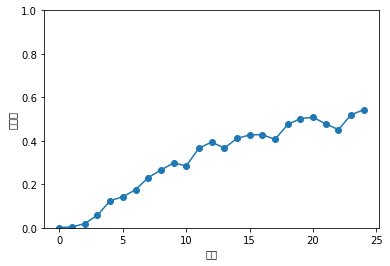

In [13]:
# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()

### 2. 엿보기(Peeky)
중요한 정보가 담긴 Encoder의 출력 **h**를 Decoder 다른 계층에게도 전해줌  
- 모든 시각의 LSTM 계층과 Affine 계층에 전달!
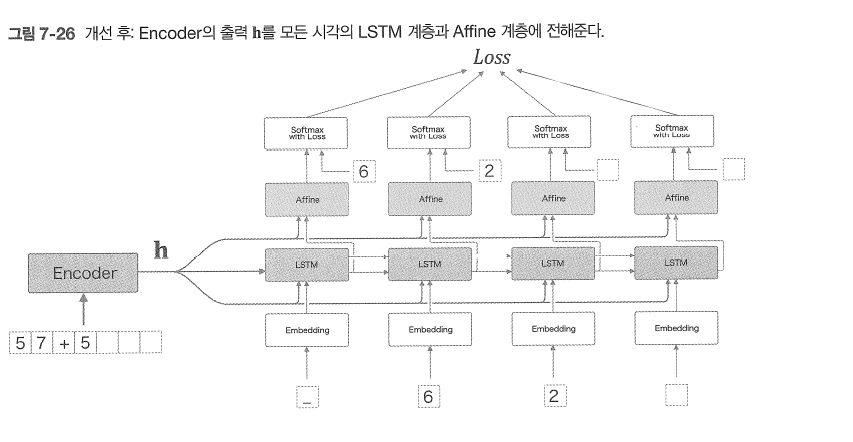

In [15]:
import sys
sys.path.append('..')
from common.time_layers import *
from ch07.seq2seq import Seq2seq, Encoder


class PeekyDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(H + D, 4 * H) / np.sqrt(H + D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        self.cache = None

        
    def forward(self, xs, h):
        N, T = xs.shape
        N, H = h.shape

        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        hs = np.repeat(h, T, axis=0).reshape(N, T, H)
        out = np.concatenate((hs, out), axis=2)

        out = self.lstm.forward(out)
        out = np.concatenate((hs, out), axis=2)

        score = self.affine.forward(out)
        self.cache = H
        return score
    
    
    def backward(self, dscore):
        H = self.cache

        dout = self.affine.backward(dscore)
        dout, dhs0 = dout[:, :, H:], dout[:, :, :H]
        dout = self.lstm.backward(dout)
        dembed, dhs1 = dout[:, :, H:], dout[:, :, :H]
        self.embed.backward(dembed)

        dhs = dhs0 + dhs1
        dh = self.lstm.dh + np.sum(dhs, axis=1)
        return dh

    
    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.lstm.set_state(h)

        H = h.shape[1]
        peeky_h = h.reshape(1, 1, H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x)

            out = np.concatenate((peeky_h, out), axis=2)
            out = self.lstm.forward(out)
            out = np.concatenate((peeky_h, out), axis=2)
            score = self.affine.forward(out)

            char_id = np.argmax(score.flatten())
            sampled.append(char_id)

        return sampled



In [16]:
class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

In [17]:
model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jeon Jiwoo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarni

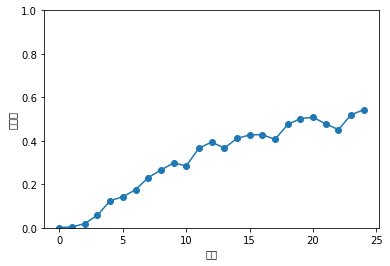

In [18]:
# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()

### 5. seq2seq를 이용하는 애플리케이션